In [141]:
# importing required packages
import pandas as pd 
import numpy as np
import seaborn as sns # for visulization
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [142]:
# loading the dataset to perform Exploratory data analysis
df = pd.read_csv("IPL Matches.csv")

In [143]:
#Simple view of data set information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [144]:
# checking individual null count
df.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

<AxesSubplot:>

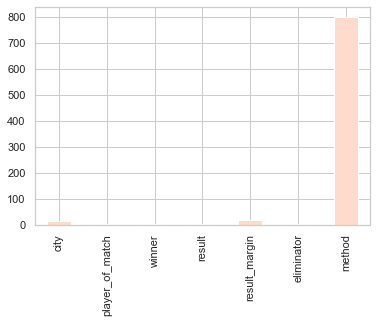

In [145]:
# lets plot the total count of null values in each column
df.isna().sum()[df.isna().sum()>0].plot(kind='bar')

#### `Method` column has too many `NaN` values its better to `drop` the column

In [146]:
df.drop('method', axis=1, inplace=True)

<AxesSubplot:>

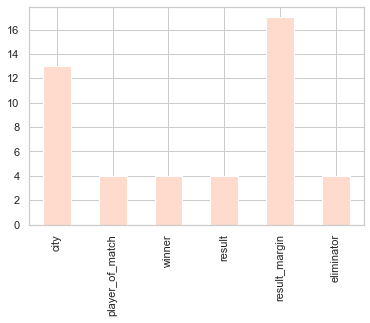

In [147]:
# checking other nan counts using barplot
df.isna().sum()[df.isna().sum()>0].plot(kind='bar')

substituting nan values with there column mean for all numerical features

In [148]:
#result_margin is a numerical feature
# result_margin_mean = df['result_margin'].mean()
df['result_margin'].replace(np.NaN, df['result_margin'].mean(), inplace=True)

In [149]:
df['result_margin'].isnull().sum()

0

<AxesSubplot:>

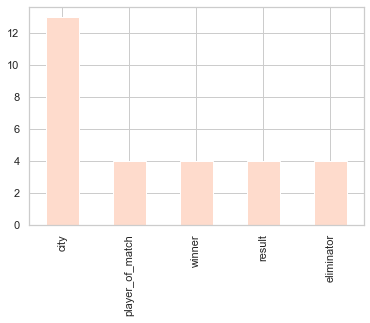

In [150]:
# checking other nan counts using barplot
df.isna().sum()[df.isna().sum()>0].plot(kind='bar')

In [151]:
#lets replace missing values in city with most occuring city 
df['city'].replace(np.NaN, df['city'].mode()[0], inplace=True)

In [152]:
df['result_margin'].isnull().sum()

0

<AxesSubplot:>

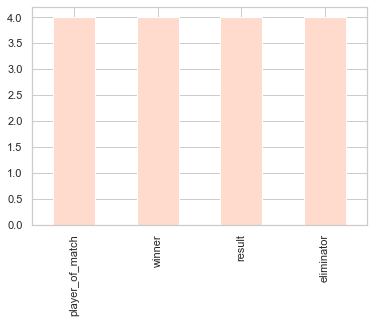

In [153]:
# checking other nan counts using barplot
df.isna().sum()[df.isna().sum()>0].plot(kind='bar')

In [154]:
#droping other remaining NaN values as of now
df.dropna(inplace=True)
df.isnull().sum()

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
umpire1            0
umpire2            0
dtype: int64

In [155]:
# checking top 5 records for see the structure and fetaures
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan


In [156]:
# The team names are changed to their corresponding short notations.
df.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

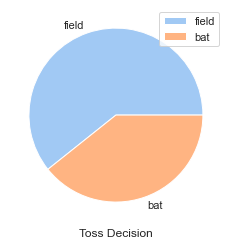

In [157]:
# Plotting toss decision
colors = sns.color_palette('pastel')[0:5]
df['toss_decision'].value_counts().plot(kind='pie',legend=True, colors=colors)
plt.xlabel('Toss Decision')
plt.ylabel('')
plt.show()

<AxesSubplot:>

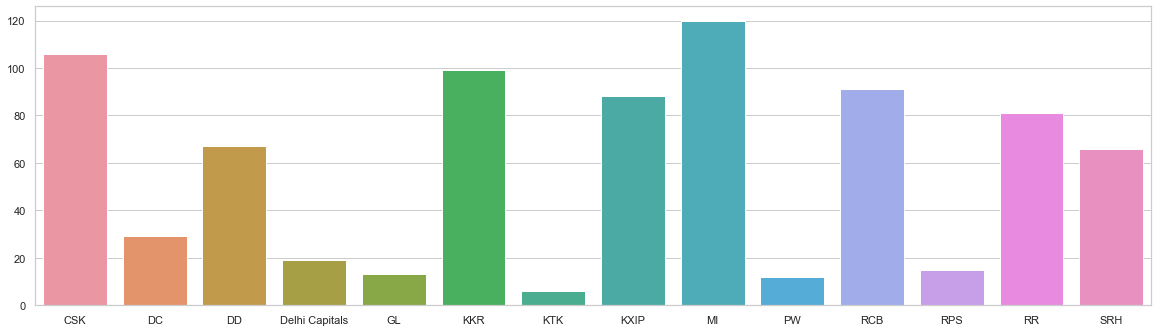

In [158]:
# Ploting Total matches won by each individual team
plt.figure(figsize=(20,5.5))
sns.barplot(y = np.unique(df['winner'], return_counts=True)[1], x=np.unique(df['winner']))

In [159]:
# HERE Rising pune supergaint and Rising pune supergaints are same teams SO Lets merge both
df.replace('Rising Pune Supergiant', 'Rising Pune Supergiants', inplace=True)

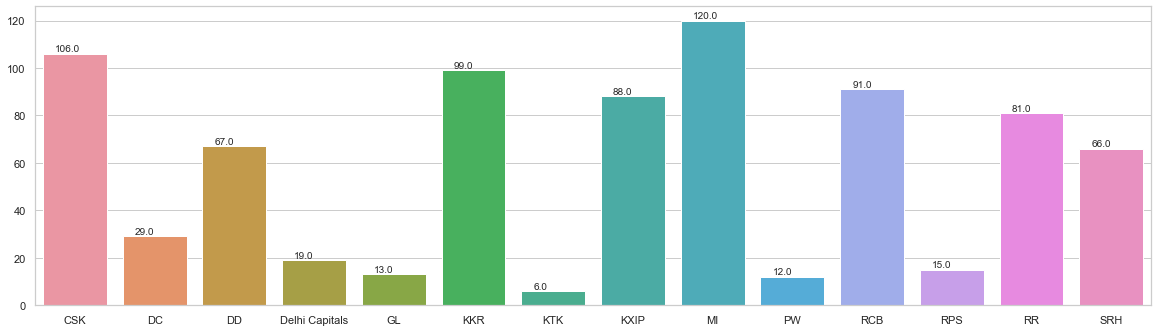

In [160]:
# Ploting Total matches won by each individual team
plt.figure(figsize=(20,5.5))
sns.set_style("whitegrid")
ax = sns.barplot(y = np.unique(df['winner'], return_counts=True)[1], x=np.unique(df['winner']))
for team in ax.patches:
    ax.annotate(format(team.get_height()), (team.get_x()+0.15, team.get_height()+1))

`Mumbai Indians` stands in first with `120` total match wins, then `Chennai Super Kings` in second with 106

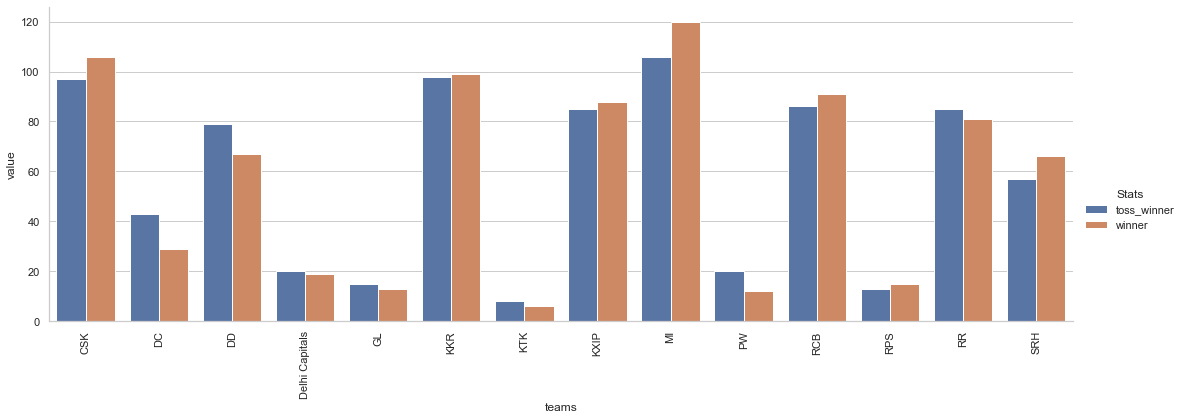

In [161]:
# Lets plot a graph against toss wins vs match wins
dfs = pd.DataFrame(data={'toss_winner': np.unique(df['toss_winner'], return_counts=True)[1], 
                        'winner': np.unique(df['winner'], return_counts=True)[1], 
                         'teams': np.unique(df['toss_winner'], return_counts=True)[0]})

dfs1 = pd.melt(dfs, id_vars = "teams")
dfs1 = dfs1.rename(columns={"variable": "Stats"})
sns.set(style='whitegrid')
ax = sns.catplot(x = 'teams', y='value', 
               hue = 'Stats',data=dfs1, kind='bar', height=5, aspect=3)

plt.xticks(rotation=90)
plt.show()

The bar graph shows that, in the majority of circumstances, `"winning the toss"` is "directly related" to `"winning"` the match.

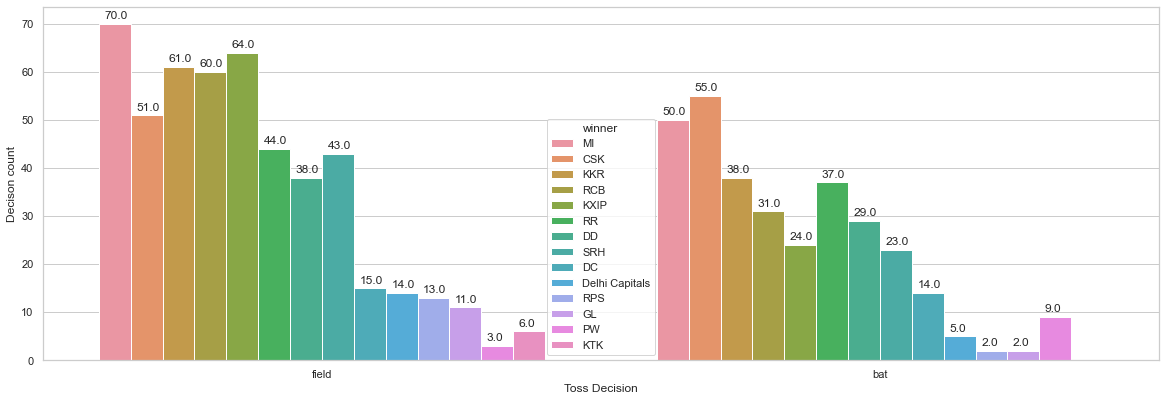

In [162]:
# plotting wins against toss decision made by the team
plt.figure(figsize=(20,6.5))
ax = sns.countplot(x='toss_decision', data = df, hue='winner', hue_order= df['winner'].value_counts().index)
for team in ax.patches:
    ax.annotate(format(team.get_height()), (team.get_x()+0.01, team.get_height()+1))
plt.xlabel('Toss Decision')
plt.ylabel('Decison count')
plt.show()

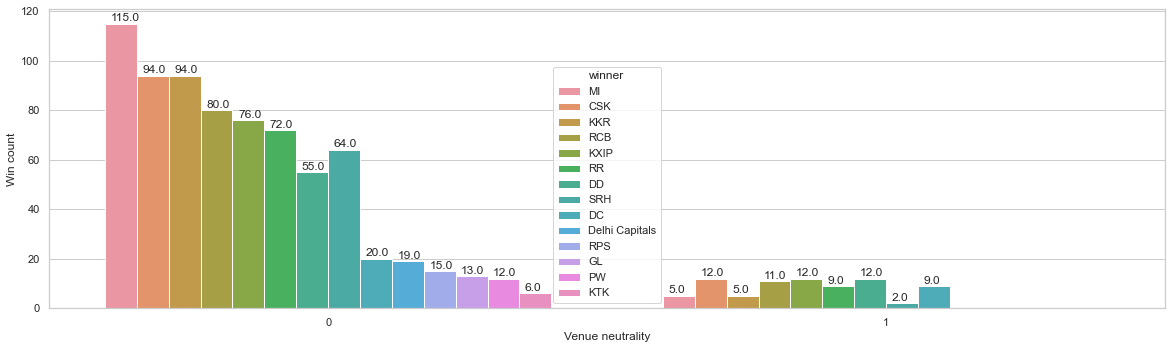

In [163]:
plt.figure(figsize=(20,5.5))
ax = sns.countplot(x='neutral_venue', data = df, hue='winner', hue_order= df['winner'].value_counts().index)
for team in ax.patches:
    ax.annotate(format(team.get_height()), (team.get_x()+0.01, team.get_height()+1))
plt.xlabel('Venue neutrality')
plt.ylabel('Win count')
plt.show()

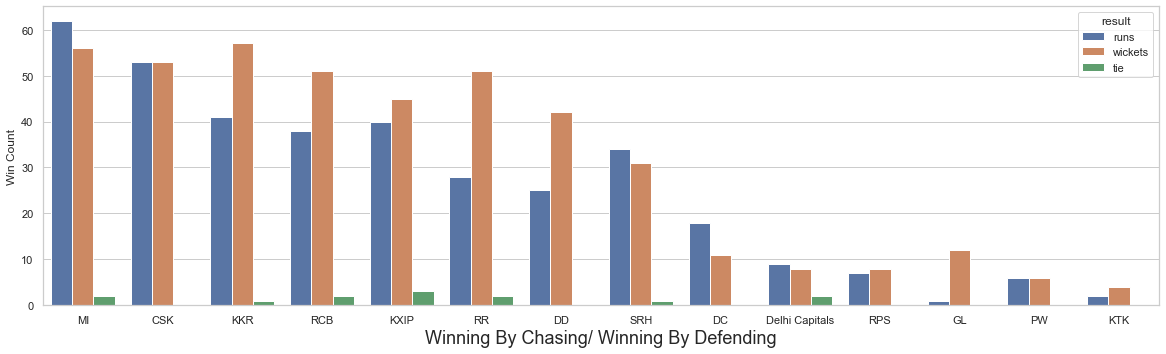

In [164]:
# lets plot wins by chasing / defending
plt.figure(figsize=(20,5.5))

sns.countplot(x='winner', data = df, hue='result', order = df['winner'].value_counts().index)
plt.xlabel('Winning By Chasing/ Winning By Defending', fontsize=18)
sns.set(style=None)
plt.ylabel('Win Count')
plt.show()

The graph dipicts that `Mumbai Indians` and `Chennai super Kings` are `best` `All rounders` i.e (defenders and chasers) where as `Kolkata Knight Riders`, `Delhi Daredevils` and `RCB` are good at `chasing`.

In [165]:
# lets create a new column name 'loser', it contains the team who lost the match.
df.head(3)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,RCB,KKR,RCB,field,KKR,runs,140.0,N,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,KXIP,CSK,CSK,bat,CSK,runs,33.0,N,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,DD,RR,RR,bat,DD,wickets,9.0,N,Aleem Dar,GA Pratapkumar


In [166]:
df['loser'] = [df.team2.iloc[index] if df.winner.iloc[index]==df.team1.iloc[index] else df.team1.iloc[index] for index in range(len(df))]

In [167]:
# displaying team1 , team2, winner and loser
df[['team1', 'team2', 'winner', 'loser']].head(5)

,team1,team2,winner,loser
0,RCB,KKR,KKR,RCB
1,KXIP,CSK,CSK,KXIP
2,DD,RR,DD,RR
3,MI,RCB,RCB,MI
4,KKR,DC,KKR,DC


Text(0.5, 0, 'lost the game after winning the toss')

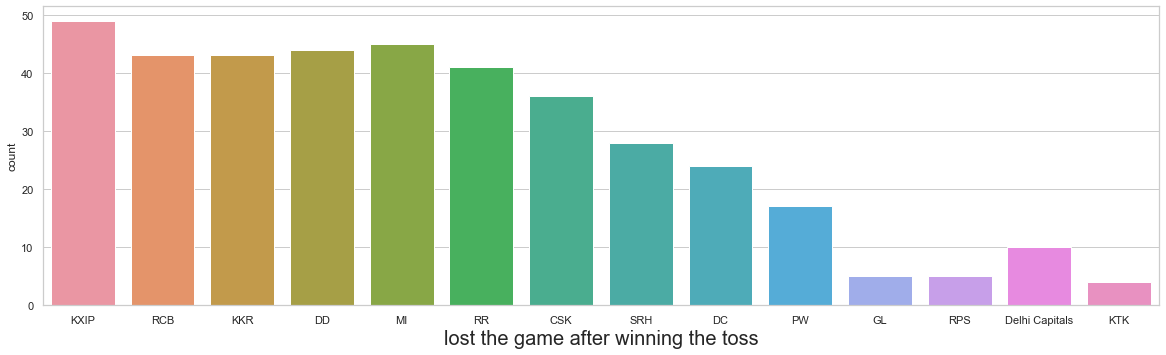

In [168]:
# We can now plot how often a team won the toss but lost the game.
plt.figure(figsize=(20,5.5))
sns.set(style='whitegrid')
sns.countplot(x='loser', data = df[df.toss_winner==df.loser], order = df['loser'].value_counts().index)
plt.xlabel('lost the game after winning the toss', fontsize= 20)

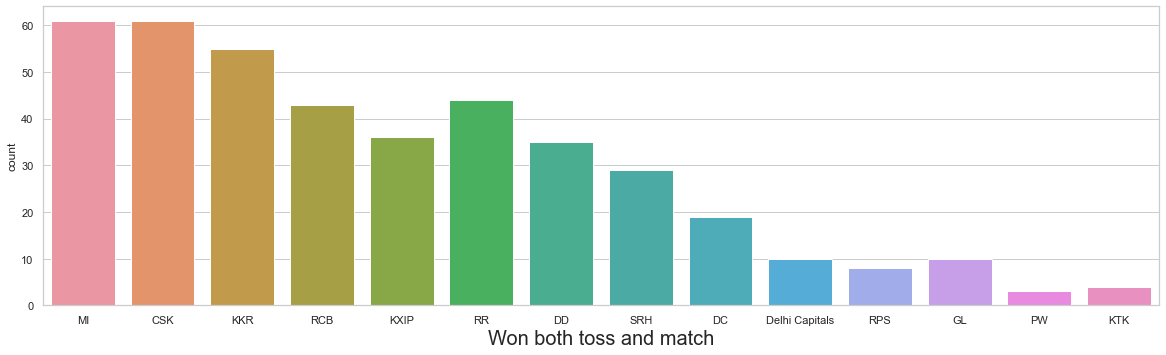

In [169]:
# We can now plot how often a team won the toss aswell as won the game.
plt.figure(figsize=(20,5.5))
sns.set(style='whitegrid')
a = sns.countplot(x='winner', data = df[df.toss_winner==df.winner], order = df['winner'].value_counts().index)
plt.xlabel('Won both toss and match', fontsize= 20)
plt.show()

The probability of winning a match is high if you win the toss because it does give you a chance to select field/bat

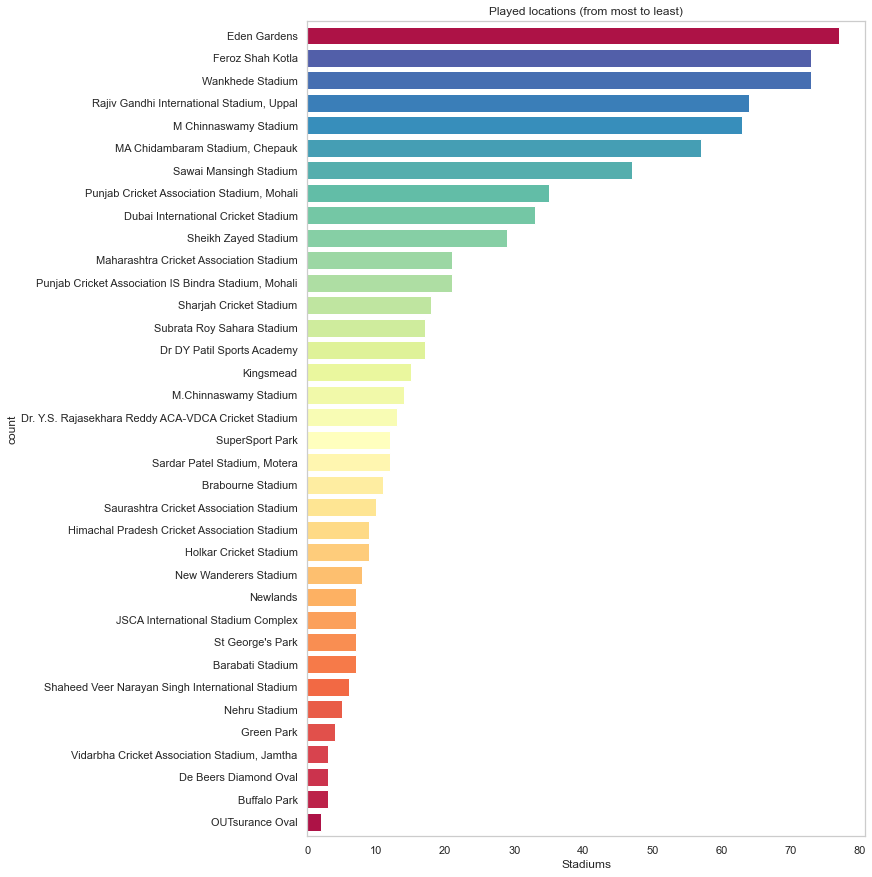

In [170]:
plt.subplots(figsize=(10,15))
sns.set(style='white')
ax = df['venue'].value_counts().sort_values(ascending=True).plot.barh(color=sns.color_palette('Spectral',35), width=.8)
ax.set_xlabel('Stadiums')
ax.set_ylabel('count')
plt.title("Played locations (from most to least)")
plt.show()

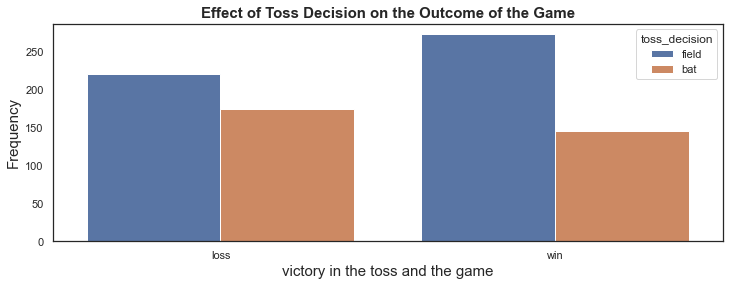

In [171]:
# df['game_and_toss_win'] = np.where((df.toss_winner == df.winner),'win','loss')
df['game_and_toss_win'] = ['win' if df.toss_winner.iloc[index]==df.winner.iloc[index] else 'loss' for index in range(len(df))]
plt.figure(figsize = (12,4))
sns.countplot(x ='game_and_toss_win', data=df, hue = 'toss_decision',)
plt.title("Effect of Toss Decision on the Outcome of the Game", fontsize=15,fontweight="bold")
plt.xlabel("victory in the toss and the game", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.show()

When a team `wins the toss`, their `chances` of winning the game `increase`.

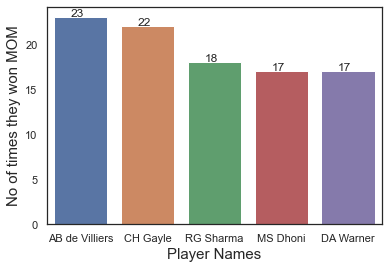

In [172]:
# plotting top 5 Man of the match
f = pd.DataFrame(pd.value_counts(df['player_of_match']))
ax = sns.barplot(y=f['player_of_match'].head(5), x=f.index[:5])
for team in ax.patches:
    ax.annotate(format(int(team.get_height())), (team.get_x()+0.25, team.get_height()+0.1))
plt.xlabel("Player Names", fontsize = 15)
plt.ylabel("No of times they won MOM", fontsize = 15)
plt.show()

With `23` victories, `"AB de Villiers"` is without a doubt the player with the most `MOM awards`.

# Model training and Model Testing

In [173]:
# lets import required packages
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [174]:
df.head(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,loser,game_and_toss_win
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,RCB,KKR,RCB,field,KKR,runs,140.0,N,Asad Rauf,RE Koertzen,RCB,loss
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,KXIP,CSK,CSK,bat,CSK,runs,33.0,N,MR Benson,SL Shastri,KXIP,win
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,DD,RR,RR,bat,DD,wickets,9.0,N,Aleem Dar,GA Pratapkumar,RR,loss
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,MI,RCB,MI,bat,RCB,wickets,5.0,N,SJ Davis,DJ Harper,MI,loss
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,KKR,DC,DC,bat,KKR,wickets,5.0,N,BF Bowden,K Hariharan,DC,loss


In [175]:
# there are plenty of categorical values lets convert them into numerical values
for column in df.columns:
    if df[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        df[column] = le.fit_transform(df[column])

In [176]:
df.head(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,loser,game_and_toss_win
0,335982,2,326,30,14,0,10,5,10,1,5,0,140.0,0,7,29,10,0
1,335983,7,348,124,23,0,7,0,0,0,0,0,33.0,0,26,40,7,1
2,335984,10,348,125,8,0,2,12,12,0,2,2,9.0,0,6,13,12,0
3,335985,23,373,140,35,0,8,10,8,0,10,2,5.0,0,39,12,8,0
4,335986,22,373,48,7,0,5,1,1,0,5,2,5.0,0,8,19,1,0


In [177]:
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [178]:
x = df.drop('winner', axis=1)
y = df['winner']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify = y)

In [179]:
%%time
LR = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=555)
RF = RandomForestClassifier(n_estimators = 100, random_state=555)
KNC = KNeighborsClassifier()
DTC = DecisionTreeClassifier()
ABC = AdaBoostClassifier(n_estimators = 100)
BC = BaggingClassifier(n_estimators = 100)
GBC = GradientBoostingClassifier(n_estimators = 100)
clf_XGB = XGBClassifier(n_estimators = 100, seed=555, eval_metric='logloss')
clfs = list()
score_list = list()
labels = ['Logistic Regression',
                       'Random Forest',
                       'KNeighbors',
                       'Decision Tree',
                       'Ada Boost',
                       'Bagging',
                       'Gradient Boosting',
                       'XGBoost']
print('5-fold cross validation:\n')
for clf, label in zip([LR, RF, KNC, DTC, ABC, BC, GBC, clf_XGB], labels):
    scores = sklearn.model_selection.cross_val_score(clf, X_train, y_train, cv=4, scoring="accuracy")
    print("Train CV Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
    md = clf.fit(X_train, y_train)
    clfs.append(md)
    score_list.append(scores.mean())
    print("Test Accuracy: %0.4f " % (sklearn.metrics.accuracy_score(clf.predict(X_test), y_test)))

5-fold cross validation:

Train CV Accuracy: 0.147 (+/- 0.031) [Logistic Regression]
Test Accuracy: 0.1567 
Train CV Accuracy: 0.665 (+/- 0.047) [Random Forest]
Test Accuracy: 0.7351 
Train CV Accuracy: 0.118 (+/- 0.019) [KNeighbors]
Test Accuracy: 0.1679 
Train CV Accuracy: 0.730 (+/- 0.030) [Decision Tree]
Test Accuracy: 0.7910 
Train CV Accuracy: 0.173 (+/- 0.022) [Ada Boost]
Test Accuracy: 0.1828 
Train CV Accuracy: 0.824 (+/- 0.033) [Bagging]
Test Accuracy: 0.8955 
Train CV Accuracy: 0.930 (+/- 0.015) [Gradient Boosting]
Test Accuracy: 0.9478 
Train CV Accuracy: 0.947 (+/- 0.008) [XGBoost]
Test Accuracy: 0.9664 
CPU times: total: 26 s
Wall time: 13.3 s


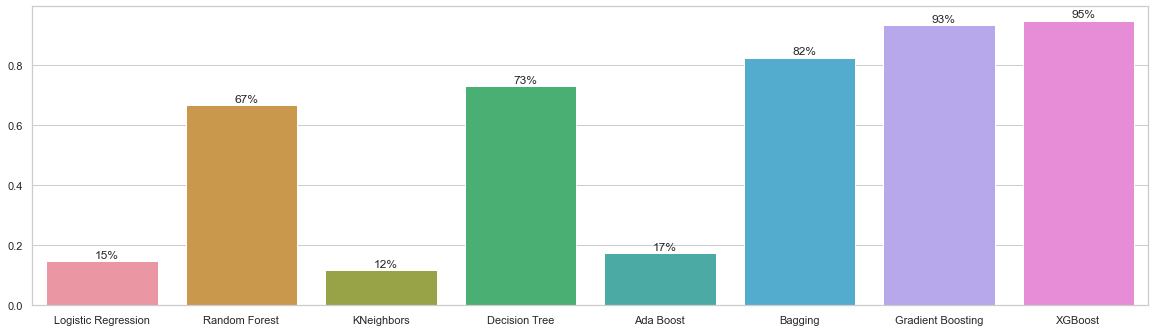

In [180]:
plt.figure(figsize=(20,5.5))
sns.set_palette("Reds")
sns.set_style('whitegrid')
ax = sns.barplot(y=score_list, x = labels)
for team in ax.patches:
    ax.annotate(format(str(int(round(team.get_height(), 2)*100))+"%"), (team.get_x()+0.35, team.get_height()+0.01))

It is clear that `Gradient Boosting` and `XGBoost` are the best fit model for this dataset.

# Preprocessing Technique
### Lets Try to Normalization Data

In [181]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
scaled_train = scaler.transform(X_train)
scaled_test = scaler.transform(X_test)

In [182]:
%%time
clfs = list()
score_list = list()
labels = ['Logistic Regression',
                       'Random Forest',
                       'KNeighbors',
                       'Decision Tree',
                       'Ada Boost',
                       'Bagging',
                       'Gradient Boosting',
                       'XGBoost']
print('5-fold cross validation:\n')
for clf, label in zip([LR, RF, KNC, DTC, ABC, BC, GBC, clf_XGB], labels):
    scores = sklearn.model_selection.cross_val_score(clf, scaled_train, y_train, cv=4, scoring="accuracy")
    print("Train CV Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
    md = clf.fit(X_train, y_train)
    clfs.append(md)
    score_list.append(scores.mean())
    print("Test Accuracy: %0.4f " % (sklearn.metrics.accuracy_score(clf.predict(scaled_test), y_test)))

5-fold cross validation:

Train CV Accuracy: 0.515 (+/- 0.027) [Logistic Regression]
Test Accuracy: 0.1157 
Train CV Accuracy: 0.665 (+/- 0.047) [Random Forest]
Test Accuracy: 0.1530 
Train CV Accuracy: 0.256 (+/- 0.027) [KNeighbors]
Test Accuracy: 0.1231 
Train CV Accuracy: 0.719 (+/- 0.032) [Decision Tree]
Test Accuracy: 0.0784 
Train CV Accuracy: 0.178 (+/- 0.020) [Ada Boost]
Test Accuracy: 0.1119 
Train CV Accuracy: 0.827 (+/- 0.017) [Bagging]
Test Accuracy: 0.0784 
Train CV Accuracy: 0.939 (+/- 0.016) [Gradient Boosting]
Test Accuracy: 0.0784 
Train CV Accuracy: 0.941 (+/- 0.014) [XGBoost]
Test Accuracy: 0.0970 
CPU times: total: 27.2 s
Wall time: 13.7 s


It is clear that `normalization` does not help much in this `particular dataset`!

### lets apply Principle component analysis

In [183]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(n_components=9)
pca.fit(scaled_train)
pca_train = pca.transform(scaled_train)
pca_test = pca.transform(scaled_test)

In [184]:
clfs = []
print('5-fold cross validation:\n')
for clf, label in zip([LR, RF, KNC, DTC, ABC, BC, GBC, clf_XGB],
                      ['Logistic Regression',
                       'Random Forest',
                       'KNeighbors',
                       'Decision Tree',
                       'Ada Boost',
                       'Bagging',
                       'Gradient Boosting',
                       'XGBoost']):
    scores = sklearn.model_selection.cross_val_score(clf, pca_train, y_train, cv=4, scoring="accuracy")
    print("Train CV Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
    md = clf.fit(pca_train, y_train)
    clfs.append(md)
    print("Test Accuracy: %0.4f " % (sklearn.metrics.accuracy_score(clf.predict(pca_test), y_test)))

5-fold cross validation:

Train CV Accuracy: 0.241 (+/- 0.024) [Logistic Regression]
Test Accuracy: 0.2463 
Train CV Accuracy: 0.235 (+/- 0.024) [Random Forest]
Test Accuracy: 0.2052 
Train CV Accuracy: 0.189 (+/- 0.013) [KNeighbors]
Test Accuracy: 0.1716 
Train CV Accuracy: 0.160 (+/- 0.021) [Decision Tree]
Test Accuracy: 0.1455 
Train CV Accuracy: 0.171 (+/- 0.029) [Ada Boost]
Test Accuracy: 0.1231 
Train CV Accuracy: 0.217 (+/- 0.020) [Bagging]
Test Accuracy: 0.2201 
Train CV Accuracy: 0.235 (+/- 0.014) [Gradient Boosting]
Test Accuracy: 0.1642 
Train CV Accuracy: 0.222 (+/- 0.008) [XGBoost]
Test Accuracy: 0.1866 


Even `PCA` doesnot help much but even worse the condition in this particular dataset!

### Lets Use `Super leaner` to combine our best model into a single layer.

In [185]:
from mlens.ensemble import SuperLearner
from mlens.model_selection import Evaluator
from mlens.metrics import make_scorer
from sklearn.metrics import accuracy_score

In [186]:
ensemble_model = SuperLearner(scorer=accuracy_score, random_state=555, verbose=2)

In [187]:
ensemble_model.add([BC,GBC])
ensemble_model.add_meta(clf_XGB)
ensemble_model.fit(X_train, y_train)
y_predicted = ensemble_model.predict(X_test)
print ("Accuracy - Train : ", sklearn.metrics.accuracy_score(ensemble_model.predict(X_train), y_train))
print ("Accuracy - Test : ", sklearn.metrics.accuracy_score(y_predicted, y_test))


Fitting 2 layers
Processing layer-1             done | 00:00:04
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:05

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Train :  0.9926470588235294
Accuracy - Test :  0.9477611940298507


#### So the highest accuracy we can achieve is 94 percent with an SuperLeaner which is preety Good!

# Consufion matrix

In [189]:
from sklearn.metrics import confusion_matrix, r2_score

In [190]:
y = confusion_matrix(y_predicted, y_test)

<AxesSubplot:>

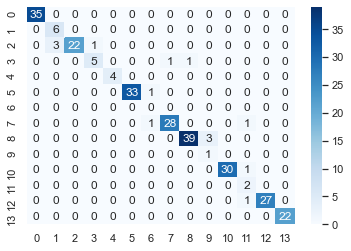

In [191]:
sns.heatmap(y, annot=True, fmt='.5g', cmap='Blues')

Accuracy is given by :
<img src='https://miro.medium.com/max/1400/1*gFW6rXbctrhWHxD8OXi4wg.png'>

In [192]:
sklearn.metrics.accuracy_score(y_predicted, y_test)

0.9477611940298507

In this example, the accuracy is nearly 94%, approximately 3.2 percent of losing teams are classified as winning . By using this example, we are attempting to demonstrate that accuracy is not a good metric when the data set is uneven. In such cases, using accuracy might lead to a false interpretation of the findings.


R^2	=	coefficient of determination <br>
RSS	=	sum of squares of residuals <br>
TSS	=	total sum of squares <br>
R^2 = 1 - (RSS/TSS)

A good classifier should have a r2_score of 1 (high).As the numerator sum of squares of residuals ( RSS) becomes lower then precision tends to 1.

In [193]:
r2_score(y_test, y_predicted)

0.9855291576673866

<svg xlink="http://www.w3.org/1999/xlink" width="224px" height="73px" viewBox="0 -2492 11618.8 3790.8" role="img" focusable="false" aria-hidden="true" style="vertical-align: -3.017ex;" xmlns="http://www.w3.org/2000/svg"><g stroke="currentColor" fill="currentColor" stroke-width="0" transform="matrix(1 0 0 -1 0 0)"><path stroke-width="10" transform="scale(1.73)" d="M230 637Q203 637 198 638T193 649Q193 676 204 682Q206 683 378 683Q550 682 564 680Q620 672 658 652T712 606T733 563T739 529Q739 484 710 445T643 385T576 351T538 338L545 333Q612 295 612 223Q612 212 607 162T602 80V71Q602 53 603 43T614 25T640 16Q668 16 686 38T712 85Q717 99 720 102T735 105Q755 105 755 93Q755 75 731 36Q693 -21 641 -21H632Q571 -21 531 4T487 82Q487 109 502 166T517 239Q517 290 474 313Q459 320 449 321T378 323H309L277 193Q244 61 244 59Q244 55 245 54T252 50T269 48T302 46H333Q339 38 339 37T336 19Q332 6 326 0H311Q275 2 180 2Q146 2 117 2T71 2T50 1Q33 1 33 10Q33 12 36 24Q41 43 46 45Q50 46 61 46H67Q94 46 127 49Q141 52 146 61Q149 65 218 339T287 628Q287 635 230 637ZM630 554Q630 586 609 608T523 636Q521 636 500 636T462 637H440Q393 637 386 627Q385 624 352 494T319 361Q319 360 388 360Q466 361 492 367Q556 377 592 426Q608 449 619 486T630 554Z"></path><g transform="translate(1321,726)"><path stroke-width="10" transform="scale(1.223)" d="M109 429Q82 429 66 447T50 491Q50 562 103 614T235 666Q326 666 387 610T449 465Q449 422 429 383T381 315T301 241Q265 210 201 149L142 93L218 92Q375 92 385 97Q392 99 409 186V189H449V186Q448 183 436 95T421 3V0H50V19V31Q50 38 56 46T86 81Q115 113 136 137Q145 147 170 174T204 211T233 244T261 278T284 308T305 340T320 369T333 401T340 431T343 464Q343 527 309 573T212 619Q179 619 154 602T119 569T109 550Q109 549 114 549Q132 549 151 535T170 489Q170 464 154 447T109 429Z"></path></g><g transform="translate(2593,0)"><path stroke-width="10" transform="scale(1.73)" d="M56 347Q56 360 70 367H707Q722 359 722 347Q722 336 708 328L390 327H72Q56 332 56 347ZM56 153Q56 168 72 173H708Q722 163 722 153Q722 140 707 133H70Q56 140 56 153Z"></path></g><g transform="translate(4428,0)"><path stroke-width="10" transform="scale(1.73)" d="M213 578L200 573Q186 568 160 563T102 556H83V602H102Q149 604 189 617T245 641T273 663Q275 666 285 666Q294 666 302 660V361L303 61Q310 54 315 52T339 48T401 46H427V0H416Q395 3 257 3Q121 3 100 0H88V46H114Q136 46 152 46T177 47T193 50T201 52T207 57T213 61V578Z"></path></g><g transform="translate(5686,0)"><path stroke-width="10" transform="scale(1.73)" d="M84 237T84 250T98 270H679Q694 262 694 250T679 230H98Q84 237 84 250Z"></path></g><g transform="translate(7040,0)"><g transform="translate(592,0)"><rect stroke="none" width="3778" height="103" x="0" y="380"></rect><g transform="translate(103,1170)"><path stroke-width="10" transform="scale(1.73)" d="M230 637Q203 637 198 638T193 649Q193 676 204 682Q206 683 378 683Q550 682 564 680Q620 672 658 652T712 606T733 563T739 529Q739 484 710 445T643 385T576 351T538 338L545 333Q612 295 612 223Q612 212 607 162T602 80V71Q602 53 603 43T614 25T640 16Q668 16 686 38T712 85Q717 99 720 102T735 105Q755 105 755 93Q755 75 731 36Q693 -21 641 -21H632Q571 -21 531 4T487 82Q487 109 502 166T517 239Q517 290 474 313Q459 320 449 321T378 323H309L277 193Q244 61 244 59Q244 55 245 54T252 50T269 48T302 46H333Q339 38 339 37T336 19Q332 6 326 0H311Q275 2 180 2Q146 2 117 2T71 2T50 1Q33 1 33 10Q33 12 36 24Q41 43 46 45Q50 46 61 46H67Q94 46 127 49Q141 52 146 61Q149 65 218 339T287 628Q287 635 230 637ZM630 554Q630 586 609 608T523 636Q521 636 500 636T462 637H440Q393 637 386 627Q385 624 352 494T319 361Q319 360 388 360Q466 361 492 367Q556 377 592 426Q608 449 619 486T630 554Z"></path><g transform="translate(1321,0)"><path stroke-width="10" transform="scale(1.73)" d="M308 24Q367 24 416 76T466 197Q466 260 414 284Q308 311 278 321T236 341Q176 383 176 462Q176 523 208 573T273 648Q302 673 343 688T407 704H418H425Q521 704 564 640Q565 640 577 653T603 682T623 704Q624 704 627 704T632 705Q645 705 645 698T617 577T585 459T569 456Q549 456 549 465Q549 471 550 475Q550 478 551 494T553 520Q553 554 544 579T526 616T501 641Q465 662 419 662Q362 662 313 616T263 510Q263 480 278 458T319 427Q323 425 389 408T456 390Q490 379 522 342T554 242Q554 216 546 186Q541 164 528 137T492 78T426 18T332 -20Q320 -22 298 -22Q199 -22 144 33L134 44L106 13Q83 -14 78 -18T65 -22Q52 -22 52 -14Q52 -11 110 221Q112 227 130 227H143Q149 221 149 216Q149 214 148 207T144 186T142 153Q144 114 160 87T203 47T255 29T308 24Z"></path></g><g transform="translate(2446,0)"><path stroke-width="10" transform="scale(1.73)" d="M308 24Q367 24 416 76T466 197Q466 260 414 284Q308 311 278 321T236 341Q176 383 176 462Q176 523 208 573T273 648Q302 673 343 688T407 704H418H425Q521 704 564 640Q565 640 577 653T603 682T623 704Q624 704 627 704T632 705Q645 705 645 698T617 577T585 459T569 456Q549 456 549 465Q549 471 550 475Q550 478 551 494T553 520Q553 554 544 579T526 616T501 641Q465 662 419 662Q362 662 313 616T263 510Q263 480 278 458T319 427Q323 425 389 408T456 390Q490 379 522 342T554 242Q554 216 546 186Q541 164 528 137T492 78T426 18T332 -20Q320 -22 298 -22Q199 -22 144 33L134 44L106 13Q83 -14 78 -18T65 -22Q52 -22 52 -14Q52 -11 110 221Q112 227 130 227H143Q149 221 149 216Q149 214 148 207T144 186T142 153Q144 114 160 87T203 47T255 29T308 24Z"></path></g></g><g transform="translate(151,-1187)"><path stroke-width="10" transform="scale(1.73)" d="M40 437Q21 437 21 445Q21 450 37 501T71 602L88 651Q93 669 101 677H569H659Q691 677 697 676T704 667Q704 661 687 553T668 444Q668 437 649 437Q640 437 637 437T631 442L629 445Q629 451 635 490T641 551Q641 586 628 604T573 629Q568 630 515 631Q469 631 457 630T439 622Q438 621 368 343T298 60Q298 48 386 46Q418 46 427 45T436 36Q436 31 433 22Q429 4 424 1L422 0Q419 0 415 0Q410 0 363 1T228 2Q99 2 64 0H49Q43 6 43 9T45 27Q49 40 55 46H83H94Q174 46 189 55Q190 56 191 56Q196 59 201 76T241 233Q258 301 269 344Q339 619 339 625Q339 630 310 630H279Q212 630 191 624Q146 614 121 583T67 467Q60 445 57 441T43 437H40Z"></path><g transform="translate(1226,0)"><path stroke-width="10" transform="scale(1.73)" d="M308 24Q367 24 416 76T466 197Q466 260 414 284Q308 311 278 321T236 341Q176 383 176 462Q176 523 208 573T273 648Q302 673 343 688T407 704H418H425Q521 704 564 640Q565 640 577 653T603 682T623 704Q624 704 627 704T632 705Q645 705 645 698T617 577T585 459T569 456Q549 456 549 465Q549 471 550 475Q550 478 551 494T553 520Q553 554 544 579T526 616T501 641Q465 662 419 662Q362 662 313 616T263 510Q263 480 278 458T319 427Q323 425 389 408T456 390Q490 379 522 342T554 242Q554 216 546 186Q541 164 528 137T492 78T426 18T332 -20Q320 -22 298 -22Q199 -22 144 33L134 44L106 13Q83 -14 78 -18T65 -22Q52 -22 52 -14Q52 -11 110 221Q112 227 130 227H143Q149 221 149 216Q149 214 148 207T144 186T142 153Q144 114 160 87T203 47T255 29T308 24Z"></path></g><g transform="translate(2351,0)"><path stroke-width="10" transform="scale(1.73)" d="M308 24Q367 24 416 76T466 197Q466 260 414 284Q308 311 278 321T236 341Q176 383 176 462Q176 523 208 573T273 648Q302 673 343 688T407 704H418H425Q521 704 564 640Q565 640 577 653T603 682T623 704Q624 704 627 704T632 705Q645 705 645 698T617 577T585 459T569 456Q549 456 549 465Q549 471 550 475Q550 478 551 494T553 520Q553 554 544 579T526 616T501 641Q465 662 419 662Q362 662 313 616T263 510Q263 480 278 458T319 427Q323 425 389 408T456 390Q490 379 522 342T554 242Q554 216 546 186Q541 164 528 137T492 78T426 18T332 -20Q320 -22 298 -22Q199 -22 144 33L134 44L106 13Q83 -14 78 -18T65 -22Q52 -22 52 -14Q52 -11 110 221Q112 227 130 227H143Q149 221 149 216Q149 214 148 207T144 186T142 153Q144 114 160 87T203 47T255 29T308 24Z"></path></g></g></g></g></g></svg>

# Feature Importance

In [196]:
import time
random_forest = RandomForestClassifier()
x = df.drop('winner', axis=1)
y = df['winner']
random_forest.fit(x, y)
start_time = time.time()
importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Time it took to calculate the importances: {elapsed_time:.3f} seconds")

Time it took to calculate the importances: 0.016 seconds


Text(0, 0.5, 'Mean decrease in impurity')

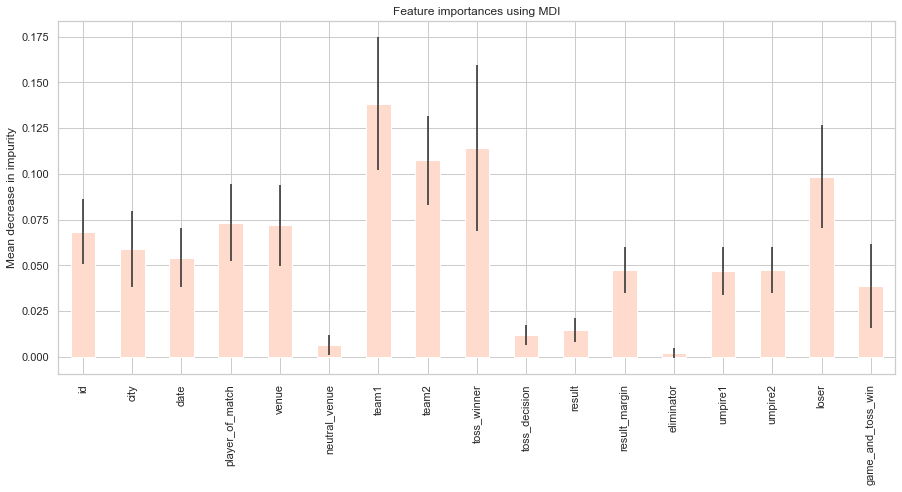

In [215]:
forest_importances = pd.Series(importances, index=x.columns)
fig, ax = plt.subplots(figsize=(15,6.5))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")


Observation reveals that traits such as `team1`, `team2`, `loser` and `toss_winner` are more relevant than others.

# CONCLUSION 
The ultimate goal is to create a model that uses the best machine learning strategy to predict who will win the game. Also Our objective is to provide reliable prediction with fewer features and tests. Only 17 essential characteristics are considered in this study. Different categorization methods were applied. Gradient boosting, Ada boost, XGBoost, and bagging are a some of the techniques used. The data was pre-processed before being utilized in the model. In this paradigm, the SuperLearner approach produced the greatest results. Other approaches, like as clustering, association rules, and evolutionary algorithms, may be used to broaden this. Given the limitations of this study, it is necessary to create more complex models that combine different types of data to achieve greater accuracy for early  match prediction..